# Project 2: Data Harmonization and Insights Extraction----By Roshan Borde

# Import required packeges 

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import skew

# Load a dataset_1 as data1 from csv file into jupyter notebook

In [6]:
data1 = pd.read_csv('dataset_1.csv')
data1.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,1,0,False,6,1,0.24
1,2,01-01-2011,1,0,1,1,False,6,1,0.22
2,3,01-01-2011,1,0,1,2,False,6,1,0.22
3,4,01-01-2011,1,0,1,3,False,6,1,0.24
4,5,01-01-2011,1,0,1,4,False,6,1,0.24


In [8]:
# Checked details information of all data including data type.
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     610 non-null    int64  
 1   dteday      610 non-null    object 
 2   season      610 non-null    int64  
 3   yr          610 non-null    int64  
 4   mnth        610 non-null    int64  
 5   hr          610 non-null    int64  
 6   holiday     610 non-null    bool   
 7   weekday     610 non-null    int64  
 8   weathersit  610 non-null    int64  
 9   temp        610 non-null    float64
dtypes: bool(1), float64(1), int64(7), object(1)
memory usage: 43.6+ KB


In [10]:
#Change Data type for Memory-efficient and ready-to-analyze dataset 1) Some Columns contain Categorical data but Dtype is showing a integer            
categorical_col = ['season','yr','mnth','hr','weekday','weathersit']
for i in categorical_col:
    data1[i] =  data1[i].astype('category')

In [12]:
# changed data type
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     610 non-null    int64   
 1   dteday      610 non-null    object  
 2   season      610 non-null    category
 3   yr          610 non-null    category
 4   mnth        610 non-null    category
 5   hr          610 non-null    category
 6   holiday     610 non-null    bool    
 7   weekday     610 non-null    category
 8   weathersit  610 non-null    category
 9   temp        610 non-null    float64 
dtypes: bool(1), category(6), float64(1), int64(1), object(1)
memory usage: 20.2+ KB


In [14]:
# Checked total number of row & columns
data1.shape

(610, 10)

In [16]:
# Checked Null or Missing Value
data1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
dtype: int64

In [18]:
# Checked duplicate value
data1.duplicated().sum()

0

In [20]:
# Initial observations about data quality and completeness.
# dataset_1(data1) contains 610 row and 10 columns. There is only column i.e. "temp" is numerical others all are categorical. 
# There is no any Null Value and Duplicated values.


# Load dataset_2 as data2

In [23]:
data2= pd.read_csv('dataset_2.csv')
data2.head()

,Unnamed: 0,instant,atemp,hum,windspeed,casual,registered,cnt
0,0,1,0.2879,0.81,0.0,3,13,16
1,1,2,0.2727,0.80,0.0,8,32,40
2,2,3,0.2727,0.80,0.0,5,27,32
3,3,4,0.2879,0.75,0.0,3,10,13
4,4,5,0.2879,0.75,0.0,0,1,1


In [25]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  610 non-null    int64  
 1   instant     610 non-null    int64  
 2   atemp       599 non-null    float64
 3   hum         610 non-null    float64
 4   windspeed   610 non-null    float64
 5   casual      610 non-null    int64  
 6   registered  610 non-null    int64  
 7   cnt         610 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 38.2 KB


In [27]:
# Checked total number of row & columns
data2.shape

(610, 8)

In [29]:
# Checked Null or Missing Value
data2.isnull().sum()

Unnamed: 0     0
instant        0
atemp         11
hum            0
windspeed      0
casual         0
registered     0
cnt            0
dtype: int64

In [31]:
# There is missing value or Null value in atemp column and data types is numerical, so here mean or median can be used fo fill these data
# here fillna funcation is used to fill these data with median 
data2['atemp'].fillna(data2['atemp'].median(), inplace = True)

In [33]:
# data has filled
data2.isnull().sum()

Unnamed: 0    0
instant       0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [35]:
# Checked duplicate value
data2.duplicated().sum()

0

In [37]:
# Drop unnessary column "Unnamed" which is contain label index value only
data2.drop("Unnamed: 0", axis = 1, inplace = True)

In [39]:
data2.head(2)

,instant,atemp,hum,windspeed,casual,registered,cnt
0,1,0.2879,0.81,0.0,3,13,16
1,2,0.2727,0.80,0.0,8,32,40


In [41]:
# Initial observations about data quality and completeness.
# dataset_2(data2) is a contain 610 row and 08 columns. There are Six numerical column others two 'instant' and 'Unnamed: 0' are categorical. 
# The column name "atemp" is containing 11 Null Value, So this null values have been filled by using fillna function with median. 
# There is no Duplicated values but there is one column name "Unnamed: 0" is unnessary so column has been droped.

# Merge the datasets using common keys. 

In [44]:
# Load dataset one
data1.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp
0,1,01-01-2011,1,0,1,0,False,6,1,0.24
1,2,01-01-2011,1,0,1,1,False,6,1,0.22


In [46]:
# Load dataset 2
data2.head(2)

,instant,atemp,hum,windspeed,casual,registered,cnt
0,1,0.2879,0.81,0.0,3,13,16
1,2,0.2727,0.80,0.0,8,32,40


In [48]:
# Merge dataset by using pd.merge on common keys/column 'instant'
merge_dataset = pd.merge(data1,data2,on = 'instant', how = 'outer')
merge_dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,False,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,False,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,False,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,False,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,False,6,1,0.24,0.2879,0.75,0.0,0,1,1


In [50]:
# Checked total number of row & columns
merge_dataset.shape

(610, 16)

In [52]:
merge_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 610 entries, 0 to 609
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     610 non-null    int64   
 1   dteday      610 non-null    object  
 2   season      610 non-null    category
 3   yr          610 non-null    category
 4   mnth        610 non-null    category
 5   hr          610 non-null    category
 6   holiday     610 non-null    bool    
 7   weekday     610 non-null    category
 8   weathersit  610 non-null    category
 9   temp        610 non-null    float64 
 10  atemp       610 non-null    float64 
 11  hum         610 non-null    float64 
 12  windspeed   610 non-null    float64 
 13  casual      610 non-null    int64   
 14  registered  610 non-null    int64   
 15  cnt         610 non-null    int64   
dtypes: bool(1), category(6), float64(4), int64(4), object(1)
memory usage: 48.8+ KB


In [54]:
# Checked Null or Missing Value
merge_dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [56]:
# Checked duplicate value
merge_dataset.duplicated().sum()

0

In [58]:
# Here created a seperate list for Nemerical columns for perform statistical analysis to evaluate central tendencies and Categorical columns for data visualizations.
numerical_col1 = ['temp','atemp','hum','windspeed','casual','registered','cnt']
categorical_col1 = merge_dataset.select_dtypes(include=['category', 'bool','object'])

In [60]:
# Basic statistical analysis to evaluate central tendencies for nemerical columns (mean, median, mode). 
central_tendencies = {"Mean": merge_dataset[numerical_col1].mean(),
    "Median": merge_dataset[numerical_col1].median(),
    "Mode": merge_dataset[numerical_col1].mode().iloc[0]}  # use .iloc[0] for first mode value

statistical_analysis = pd.DataFrame(central_tendencies)
print(statistical_analysis)

                 Mean  Median    Mode
temp         0.196885   0.200  0.2000
atemp        0.199882   0.197  0.1970
hum          0.562475   0.520  0.4700
windspeed    0.204851   0.194  0.1642
casual       4.501639   2.000  0.0000
registered  51.068852  43.000  1.0000
cnt         55.570492  47.000  1.0000


In [62]:
# Observations:-
#   The Central Tendencies (Mean, Median, Mode) of total count (cnt) is near to the registered column.
#   so here it can be said that number of registered user rentals initiated more renat service than casual user.  

In [64]:
# checked five number summary
merge_dataset.describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000,610.000000
mean,305.500000,0.196885,0.199882,0.562475,0.204851,4.501639,51.068852,55.570492
std,176.236111,0.081304,0.078121,0.175440,0.121806,6.319945,47.021204,49.316802
min,1.000000,0.020000,0.000000,0.210000,0.000000,0.000000,0.000000,1.000000
25%,153.250000,0.160000,0.151500,0.432500,0.104500,0.000000,14.000000,16.000000
50%,305.500000,0.200000,0.197000,0.520000,0.194000,2.000000,43.000000,47.000000
75%,457.750000,0.235000,0.227300,0.690000,0.283600,6.000000,70.000000,79.750000
max,610.000000,0.460000,0.454500,1.000000,0.582100,47.000000,247.000000,249.000000


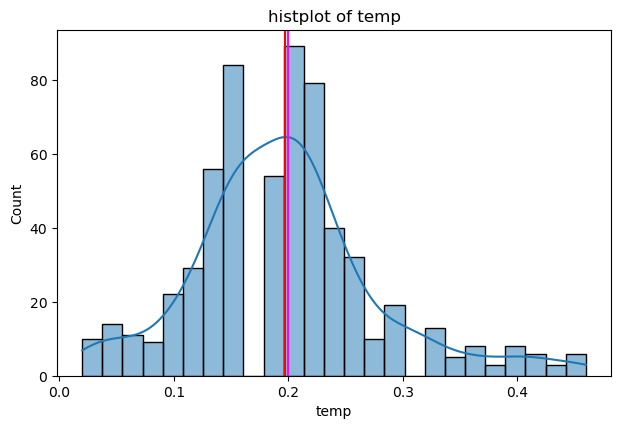

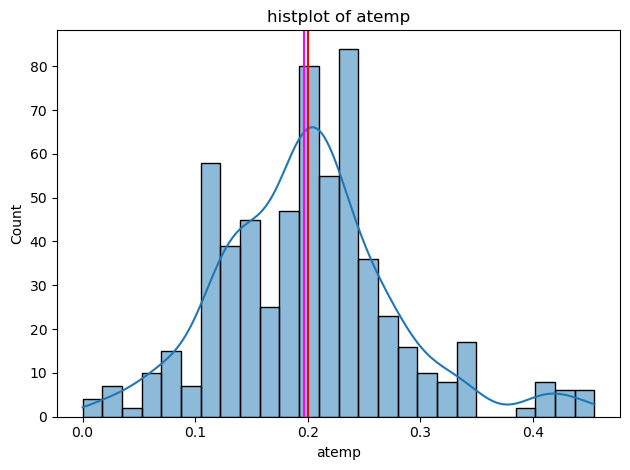

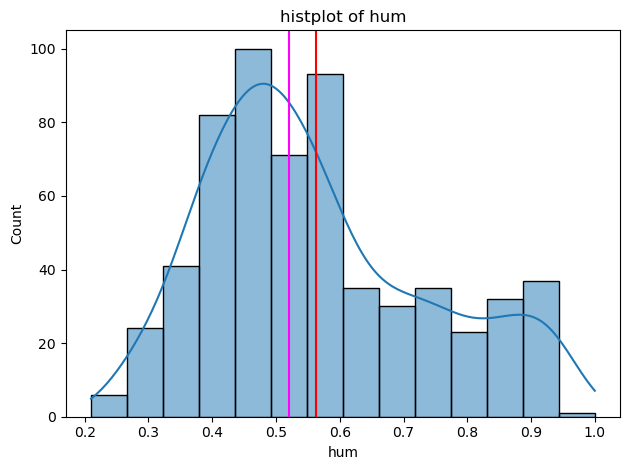

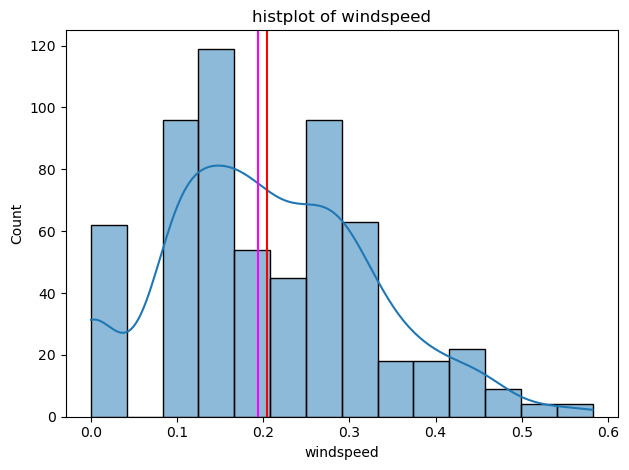

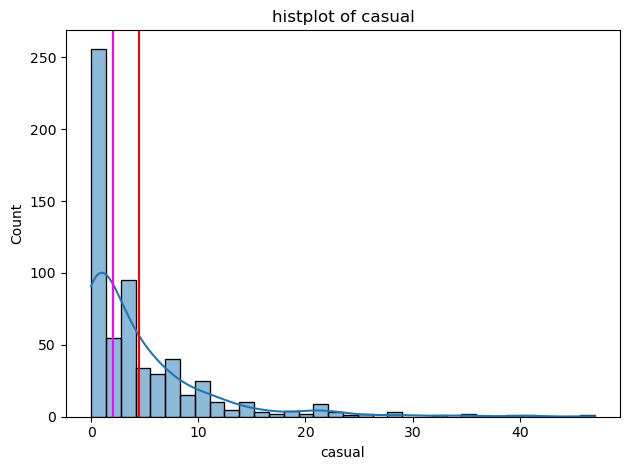

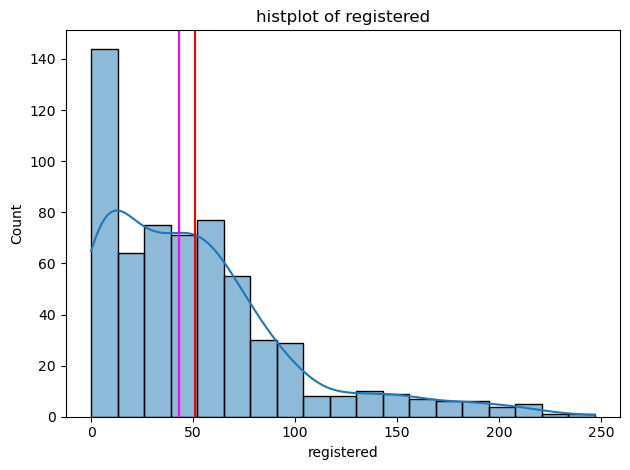

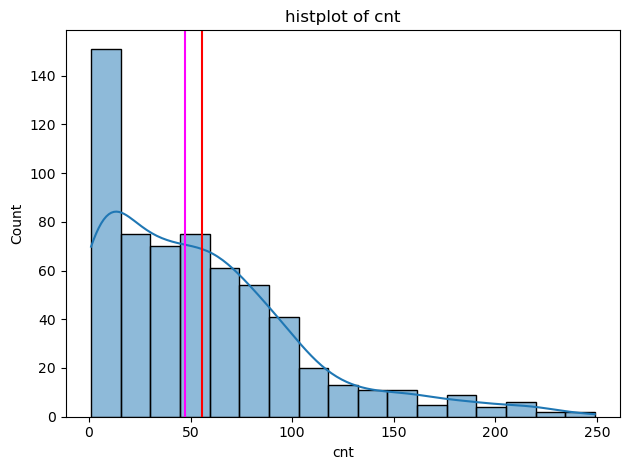

In [66]:
# Nemerical data for visualizations by using Histogram.
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
for col in numerical_col1:
    sns.histplot(merge_dataset[col],kde=True)
    plt.axvline(merge_dataset[col].mean(), color="Red")
    plt.axvline(merge_dataset[col].median(), color= "magenta")
    plt.title(f'histplot of {col}')
    plt.tight_layout()
    plt.show()

In [67]:
# Observations:
# By Analysing numerical data like temp,atemp and hum have a normal distributions but data like windspeed, casual, registered and cnt have Skiwness distribution.


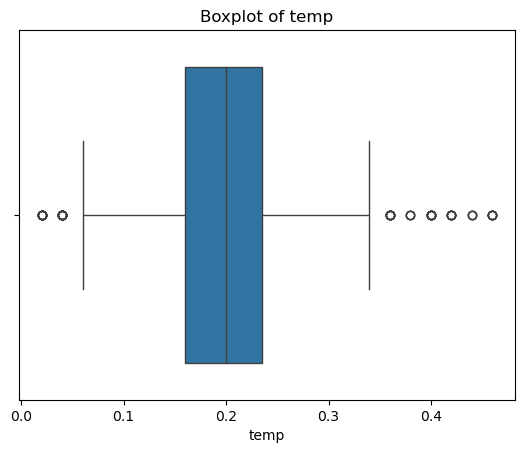

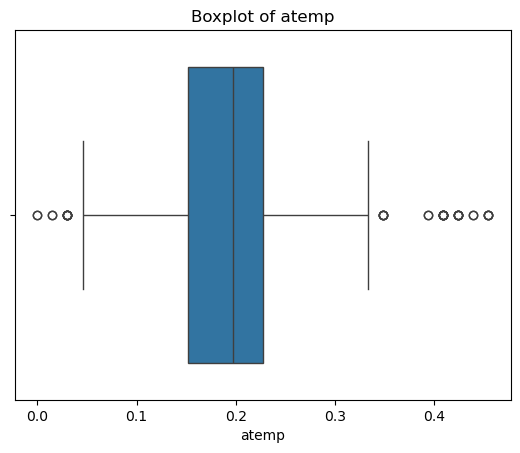

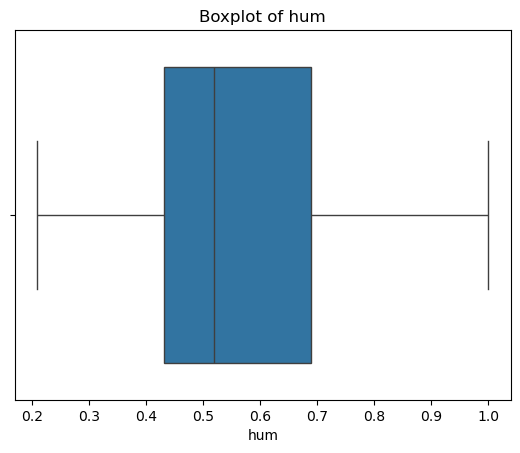

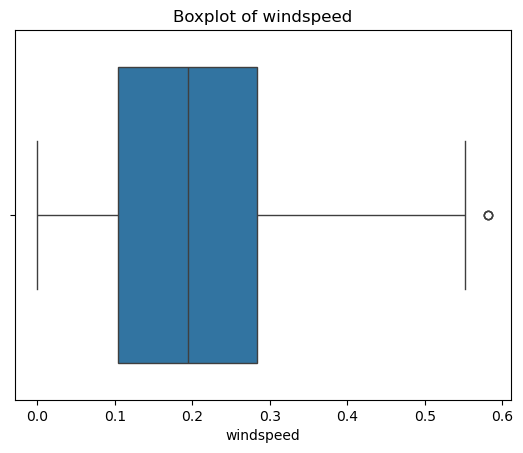

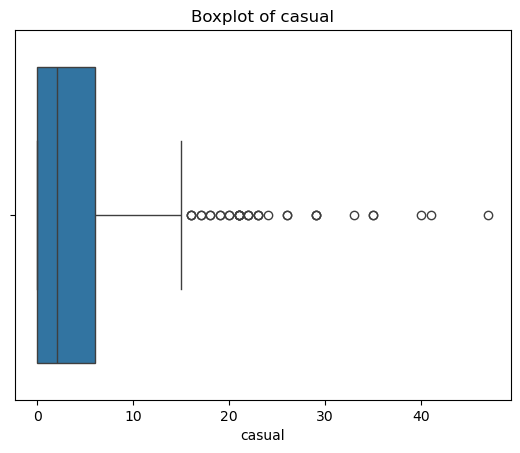

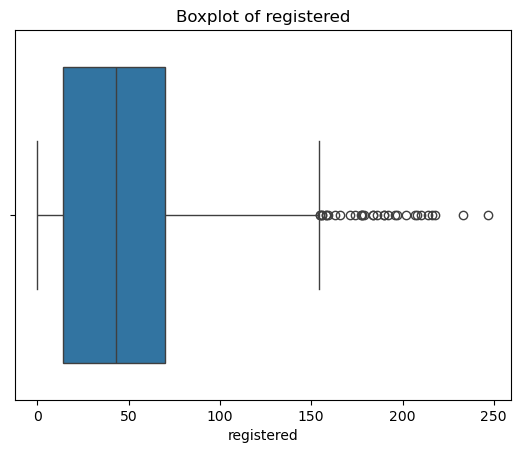

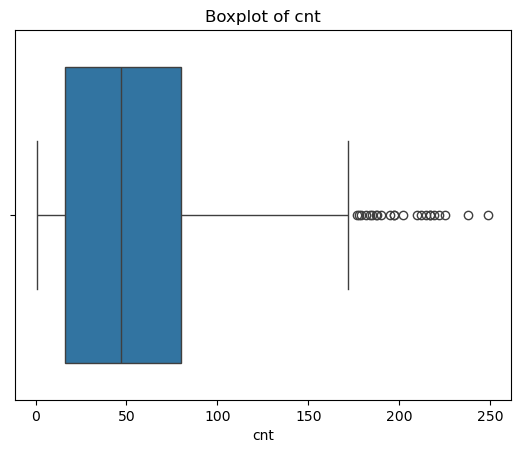

In [70]:
# Nemerical data for visualizations by using Boxplot.
for col in numerical_col1:
    sns.boxplot(x = merge_dataset[col],vert= False)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [71]:
# Observations:
# By Analysing numerical data, all columns have a outliers except (hum)humidity. which need to remove or capp for nutralise the influence on central tendancy.

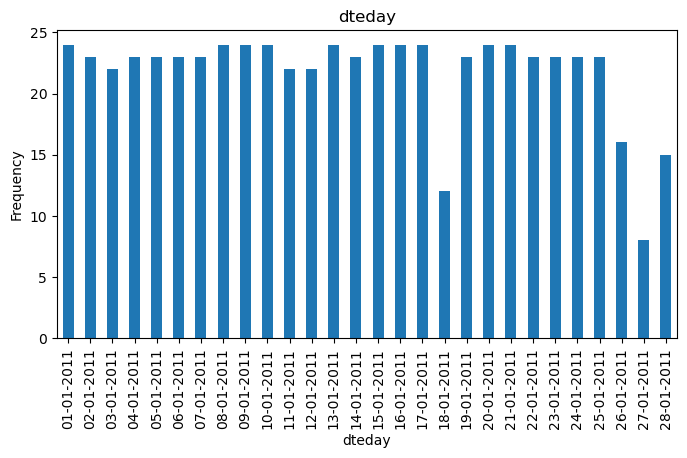

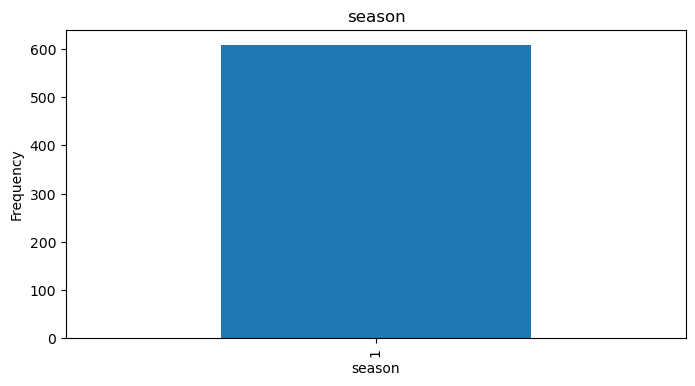

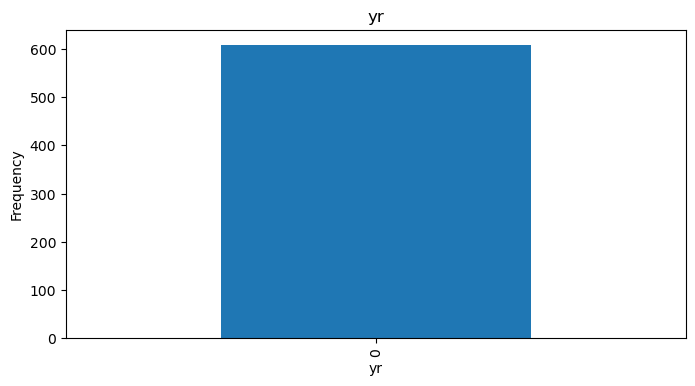

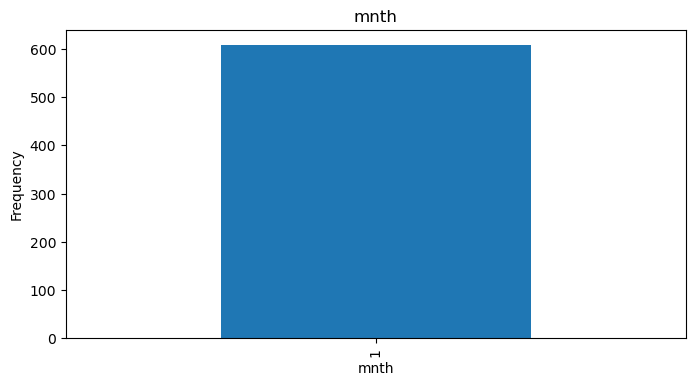

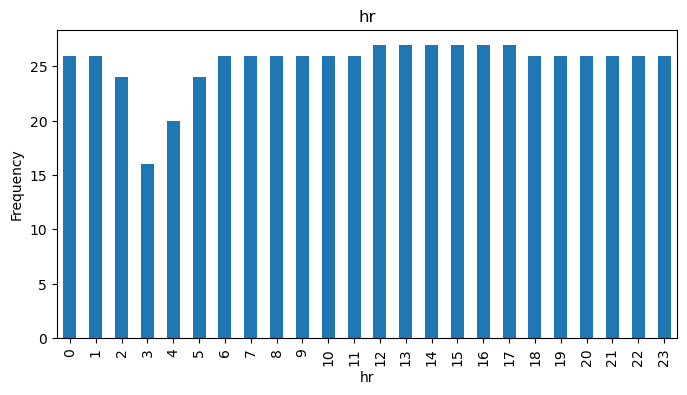

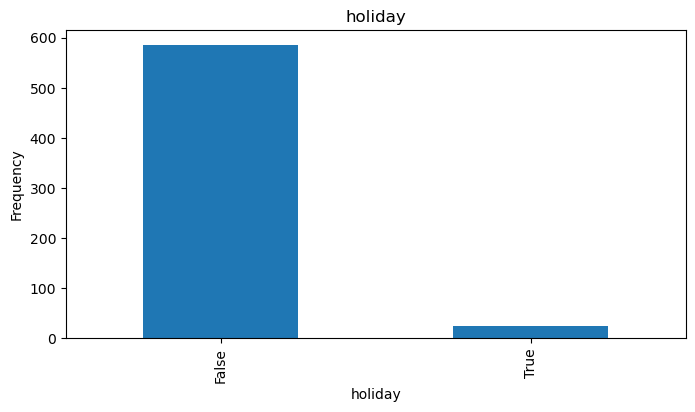

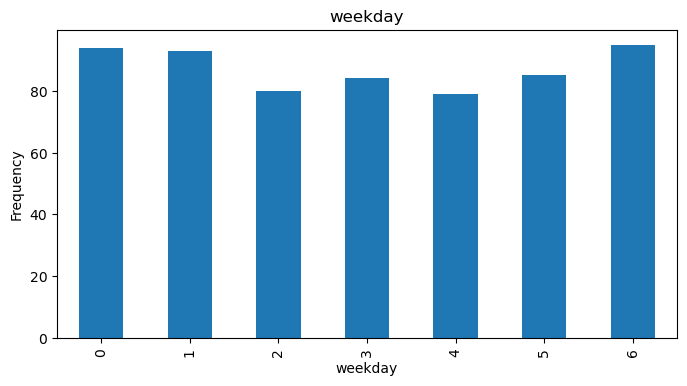

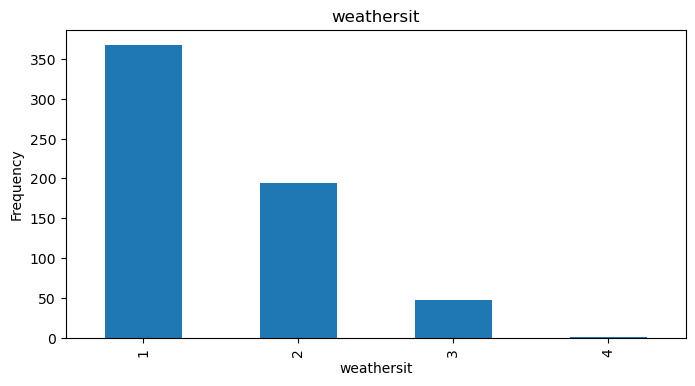

In [74]:
# Categorical data for visualizations by using Bar plot.
for col in categorical_col1:
    fig= plt.figure(figsize=(8,4))
    ax= fig.gca()
    merge_dataset[col].value_counts().sort_index().plot.bar()
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.show()

In [75]:
# Observations:
# The Date,season,yr,mnth are not giving to much information but hr(hour),holyday,weekday,weathersit give kind of information.
# The hr(hour) column shows bwetween 2-4 have less frequency.
# The working days have a high number of data
# weathersit like 1 (clear) have a high number of frequency.

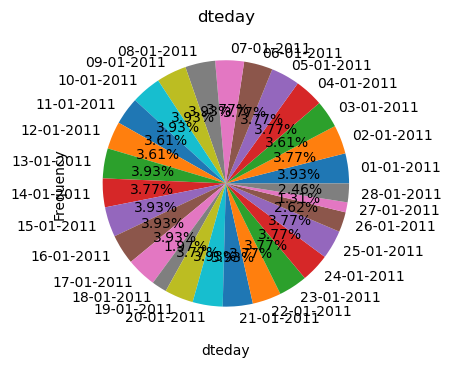

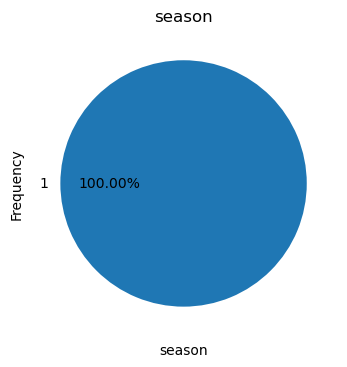

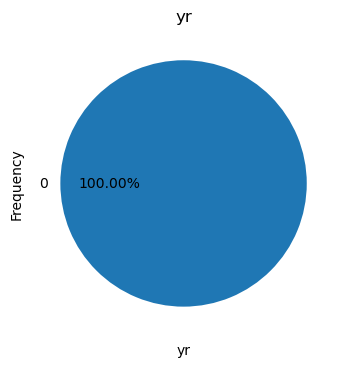

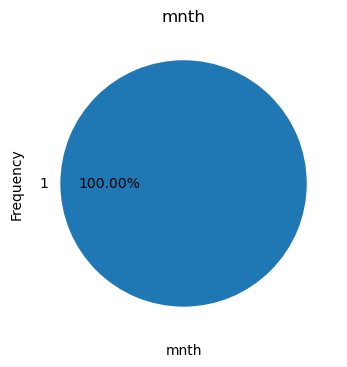

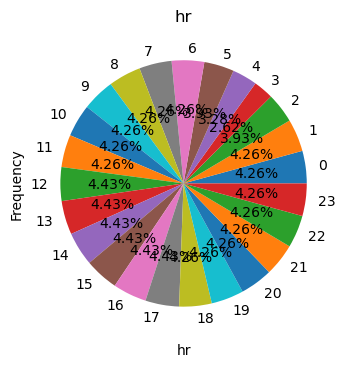

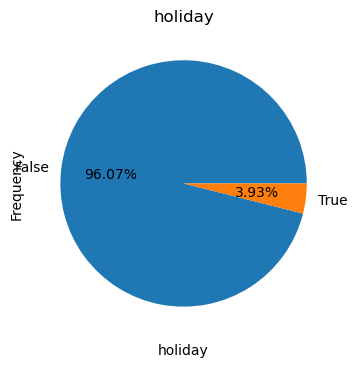

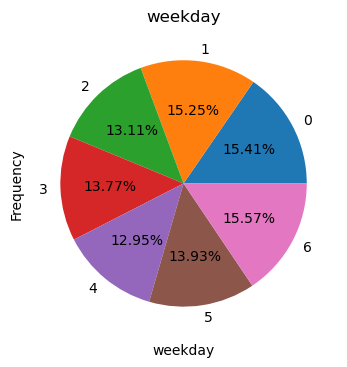

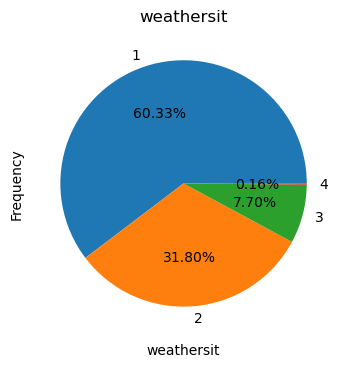

In [76]:
# Categorical data for visualizations by using Bar plot.
for col in categorical_col1:
    fig= plt.figure(figsize=(8,4))
    ax= fig.gca()
    merge_dataset[col].value_counts().sort_index().plot.pie(autopct="%1.2f%%")
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.show()

In [79]:
# Observations:
# The Date,season,yr,mnth are not giving to much information because there is only one variable there in. but hr(hour),holyday,weekday,weathersit give kind of information.
# The hr(hour) column shows bwetween 2-4 have less frequency.
# The working days have a high number of data
# weathersit like 1 (clear) have a high number of frequency as compare to others.

# Concatenate Dataset_3 with the merge_dataset. 

In [83]:
data3 = pd.read_csv('dataset_3.csv')
data3.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,620,29-01-2011,1,0,1,1,False,6,1,0.22,0.2273,0.64,0.1940,0,20,20
1,621,29-01-2011,1,0,1,2,False,6,1,0.22,0.2273,0.64,0.1642,0,15,15
2,622,29-01-2011,1,0,1,3,False,6,1,0.20,0.2121,0.64,0.1343,3,5,8
3,623,29-01-2011,1,0,1,4,False,6,1,0.16,0.1818,0.69,0.1045,1,2,3
4,624,29-01-2011,1,0,1,6,False,6,1,0.16,0.1818,0.64,0.1343,0,2,2


In [85]:
# Checked total number of row & columns
data3.shape

(390, 16)

In [87]:
# concatenating along rows(Verticaly) because merge_dataset contain same columns as contained in dastaset_3
combined_dataset = pd.concat([merge_dataset,data3], axis = 0)
combined_dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2011,1,0,1,0,False,6,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,01-01-2011,1,0,1,1,False,6,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,01-01-2011,1,0,1,2,False,6,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,01-01-2011,1,0,1,3,False,6,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,01-01-2011,1,0,1,4,False,6,1,0.24,0.2879,0.75,0.0,0,1,1


In [89]:
# Checked total number of row & columns
combined_dataset.shape

(1000, 16)

In [91]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 389
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     1000 non-null   int64  
 1   dteday      1000 non-null   object 
 2   season      1000 non-null   int64  
 3   yr          1000 non-null   int64  
 4   mnth        1000 non-null   int64  
 5   hr          1000 non-null   int64  
 6   holiday     1000 non-null   bool   
 7   weekday     1000 non-null   int64  
 8   weathersit  1000 non-null   int64  
 9   temp        1000 non-null   float64
 10  atemp       1000 non-null   float64
 11  hum         1000 non-null   float64
 12  windspeed   1000 non-null   float64
 13  casual      1000 non-null   int64  
 14  registered  1000 non-null   int64  
 15  cnt         1000 non-null   int64  
dtypes: bool(1), float64(4), int64(10), object(1)
memory usage: 126.0+ KB


In [93]:
# Change Data type for Memory-efficient and ready-to-analyze dataset  1) Some Columns contain Categorical data but Dtype is showing a integer            
categorical_col2 = ['season','yr','mnth','hr','weekday','weathersit']
for i in categorical_col2:
    combined_dataset[i] =  combined_dataset[i].astype('category')

In [95]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 389
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     1000 non-null   int64   
 1   dteday      1000 non-null   object  
 2   season      1000 non-null   category
 3   yr          1000 non-null   category
 4   mnth        1000 non-null   category
 5   hr          1000 non-null   category
 6   holiday     1000 non-null   bool    
 7   weekday     1000 non-null   category
 8   weathersit  1000 non-null   category
 9   temp        1000 non-null   float64 
 10  atemp       1000 non-null   float64 
 11  hum         1000 non-null   float64 
 12  windspeed   1000 non-null   float64 
 13  casual      1000 non-null   int64   
 14  registered  1000 non-null   int64   
 15  cnt         1000 non-null   int64   
dtypes: bool(1), category(6), float64(4), int64(4), object(1)
memory usage: 86.6+ KB


In [97]:
# Checked Null or Missing Value
combined_dataset.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [103]:
# Checked duplicate value
combined_dataset.duplicated().sum()

0

In [105]:
# Here seperates lists are created for Numerical and Categorical Columns for better analysis
# Here casual and registered columns are excluded from numerical columns list because these both columns nothing but sum of cnt(Total counts) column.
numerical_data2=['temp','atemp','hum','windspeed','cnt']
categorical_col2=['mnth','hr','holiday','weekday','weathersit']
# (Here season, yr are not included in categorical data list because there is only one season i.e. spring and only one year i.e.2011 is given)

In [107]:
# Checked Five Number Summary of all Nemerical Data
combined_dataset[numerical_data2].describe()

,temp,atemp,hum,windspeed,cnt
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.205900,0.211793,0.582480,0.194931,58.304000
std,0.078977,0.076295,0.187977,0.129126,50.985558
min,0.020000,0.000000,0.210000,0.000000,1.000000
25%,0.160000,0.166700,0.440000,0.104500,16.000000
50%,0.200000,0.212100,0.550000,0.164200,49.000000
75%,0.240000,0.257600,0.700000,0.283600,83.000000
max,0.460000,0.454500,1.000000,0.582100,249.000000


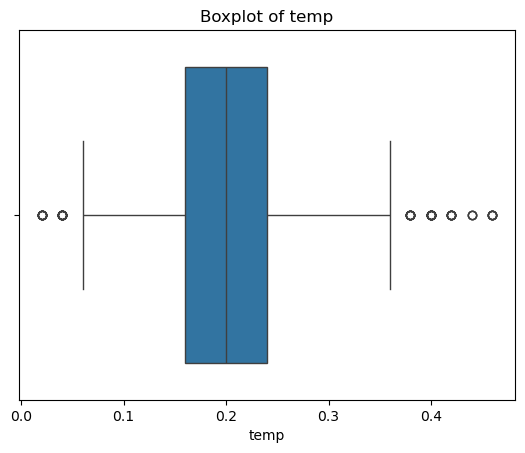

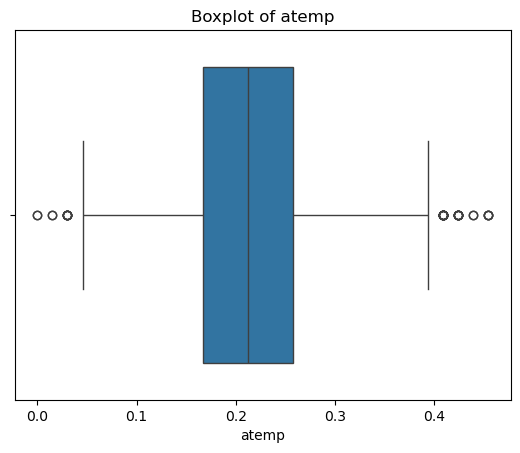

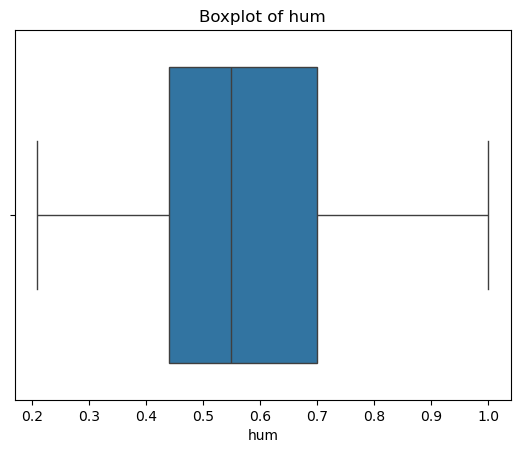

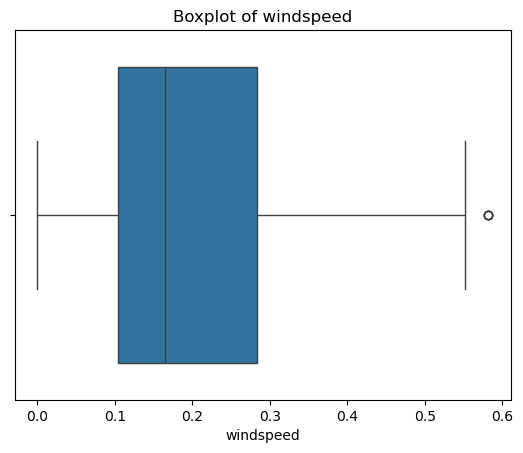

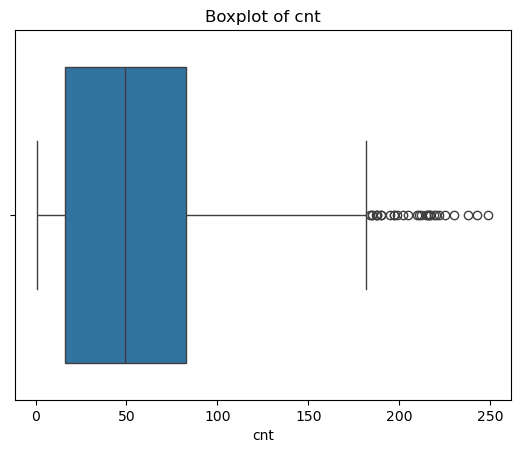

In [109]:
# Outlier detection by using boxplot.
for col in numerical_data2:
    sns.boxplot(x = combined_dataset[col],vert= False)
    plt.title(f'Boxplot of {col}')
    plt.show()

In [111]:
# Outlier detection => By checking outliers it came to know that temp, atemp, windspeed and cnt(Total counts) have a outliers.

In [113]:
# Here, IQR(Inter Quartile Range) Method is used to calculate outliers and capp with Min_value for Lower Value and Max_value for Upper Value.
for col in numerical_data2:
    Q1 = combined_dataset[col].quantile(0.25)
    Q3 = combined_dataset[col].quantile(0.75)
    IQR = Q3 - Q1
    Min_value = Q1 - 1.5 * IQR
    Max_value = Q3 + 1.5 * IQR
  
    print(f"{col} = Lower Value: {round(Min_value,2)}, Upper Value: {round(Max_value,2)}")

# Capping to handle outliers. 
    combined_dataset[col] = np.where(combined_dataset[col] > Max_value,Max_value,
                        np.where(combined_dataset[col] < Min_value, Min_value,combined_dataset[col]))


temp = Lower Value: 0.04, Upper Value: 0.36
atemp = Lower Value: 0.03, Upper Value: 0.39
hum = Lower Value: 0.05, Upper Value: 1.09
windspeed = Lower Value: -0.16, Upper Value: 0.55
cnt = Lower Value: -84.5, Upper Value: 183.5


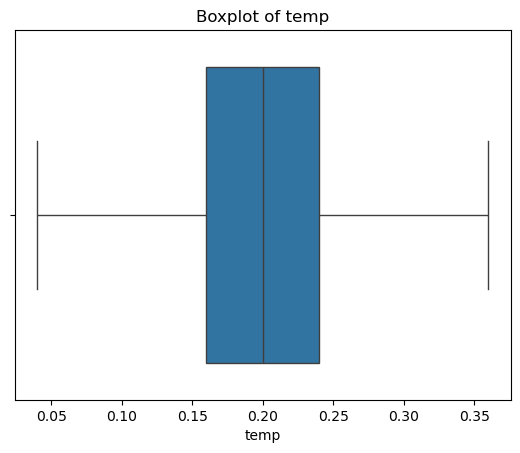

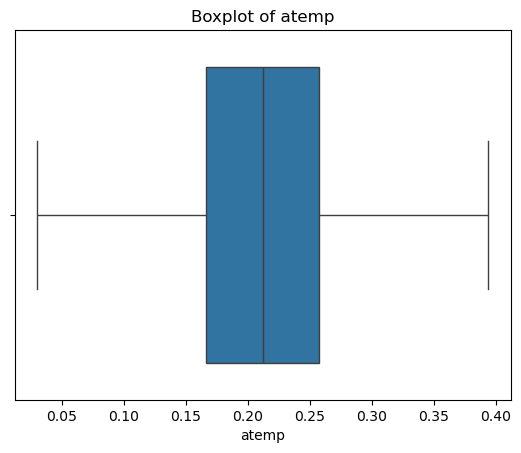

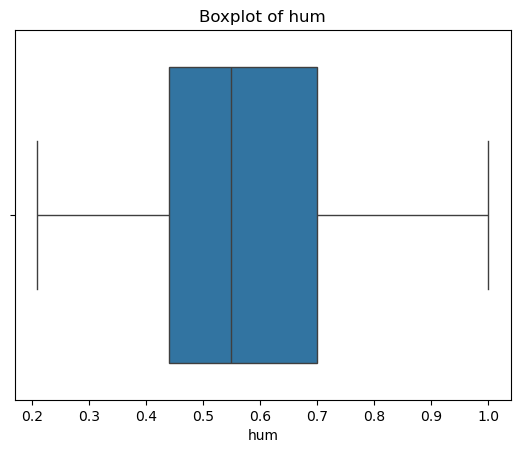

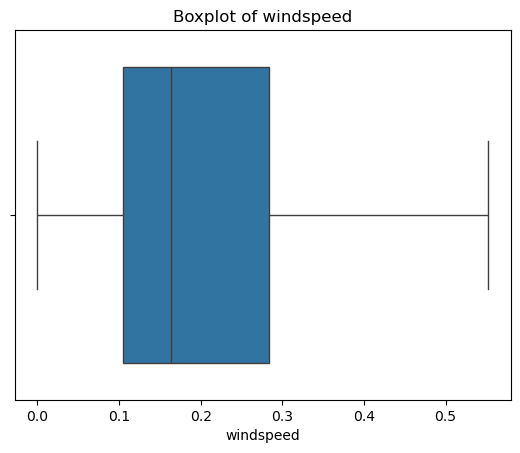

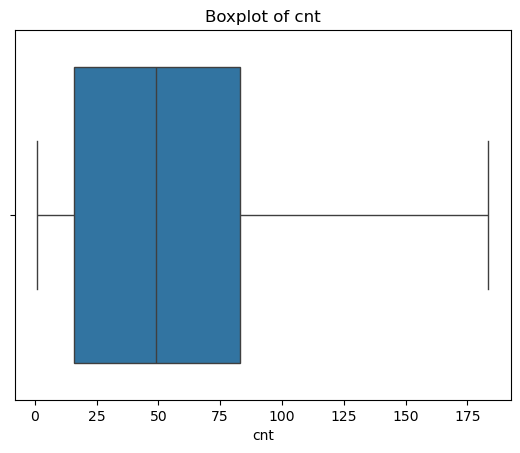

In [115]:
# Checked Outliers after Capping
for col in numerical_data2:
    sns.boxplot(x = combined_dataset[col],vert= False)
    plt.title(f'Boxplot of {col}')
    plt.show()

temp
0.23618037453415291


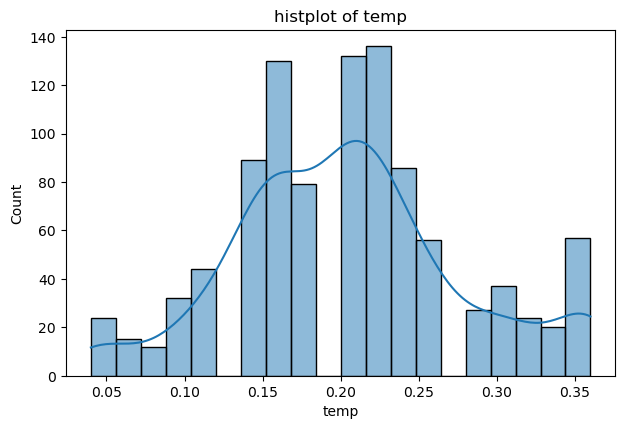

atemp
0.2900000481526452


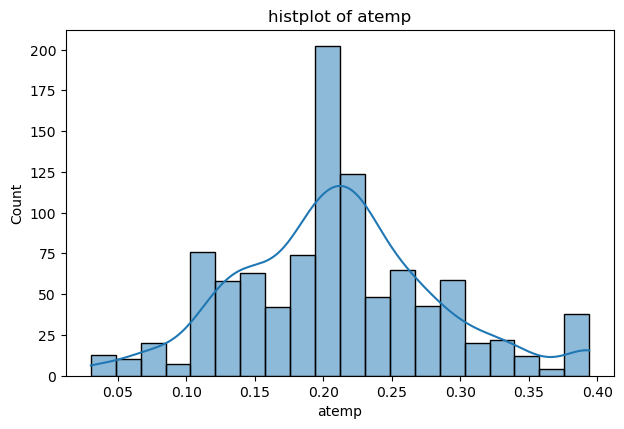

hum
0.4362378510663466


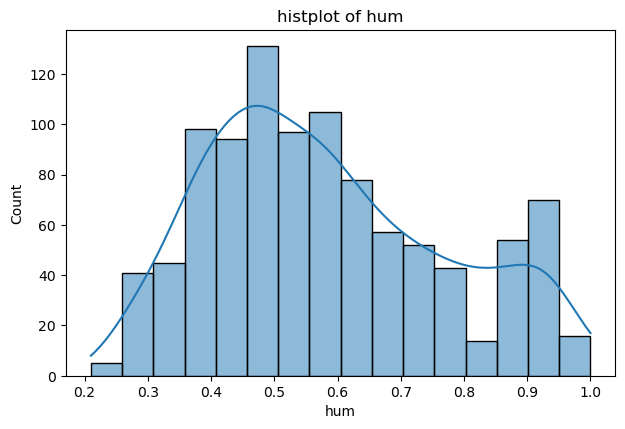

windspeed
0.4160105397940164


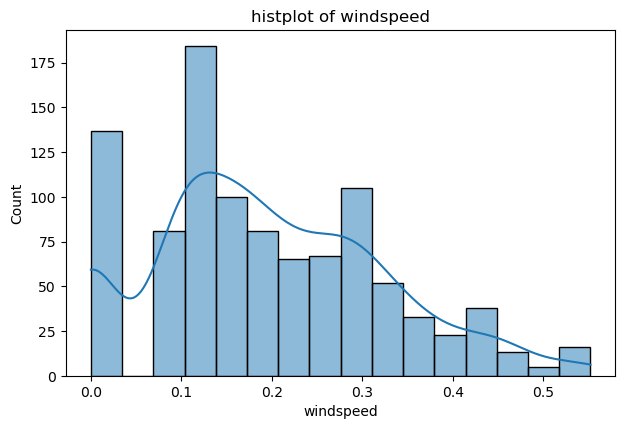

cnt
0.9360317915908105


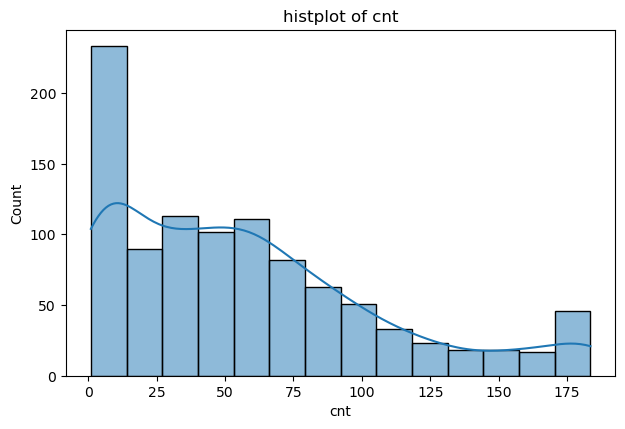

In [117]:
# Checked the distributions and skewness of numerical data.
for col in numerical_data2:
    print(col)
    print(skew(combined_dataset[col]))
    plt.figure(figsize=(12, 8))
    plt.subplot(2, 2, 1)
    sns.histplot(combined_dataset[col],kde=True)     
    plt.title(f'histplot of {col}')
    plt.tight_layout()
    plt.show()

In [118]:
# Observation:
# All data indicates moderate positive skewness.
# The data columns like temp, atemp have a Normal Distributions but data type like hum ,windspeed and cnt have a slightly skewness distributions.
#  The data columns like temp, atemp, hum ,windspeed have a less than 0.5 skewness, so it is not necessary to transform.
# The data columns like cnt(Total counts) have 0.93 skiwness but it does not impacts on analysis because cnt(Total counts) is considered as target data. So, it is not necessary to transform

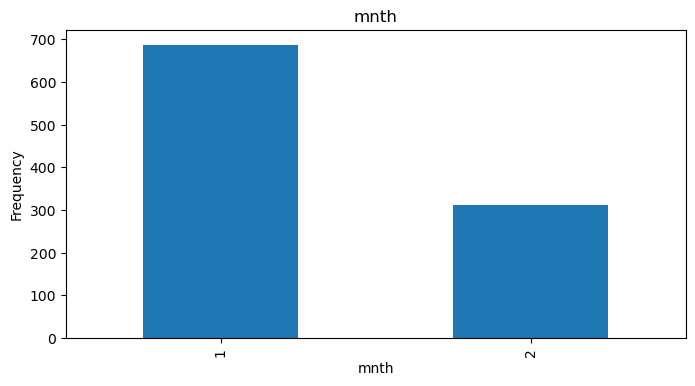

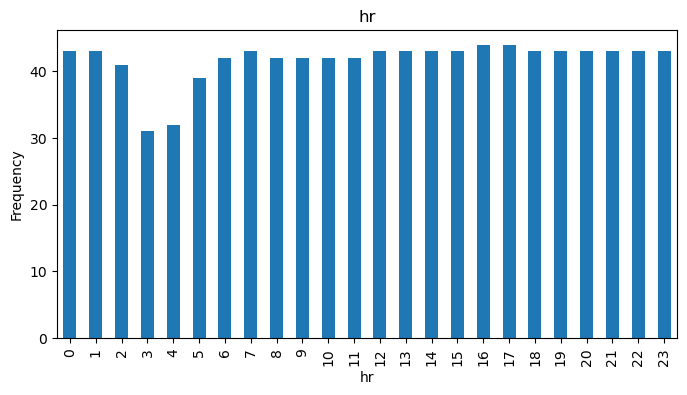

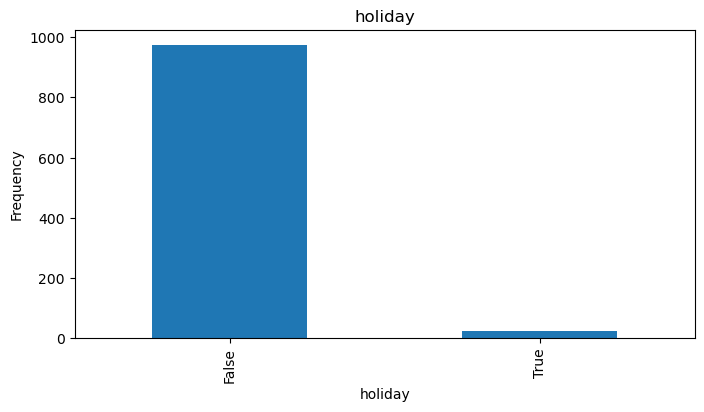

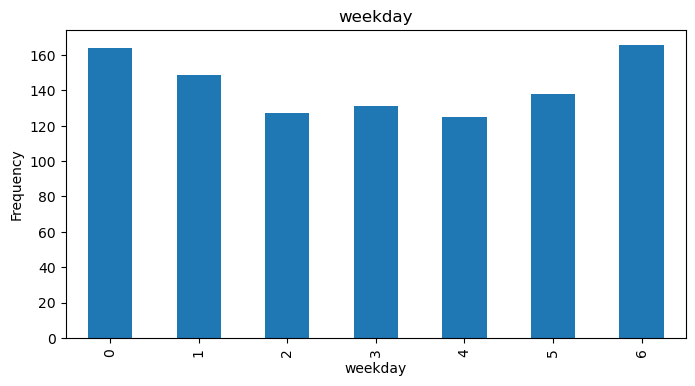

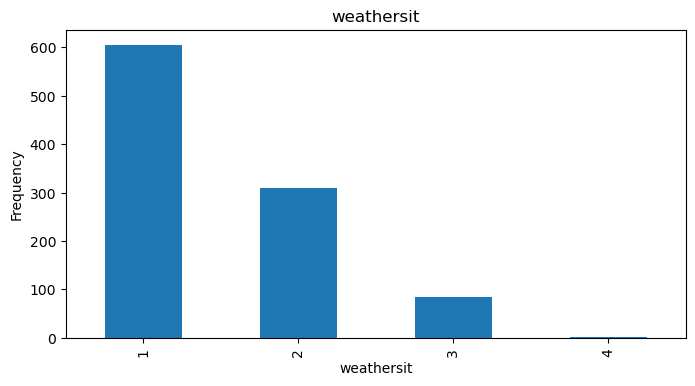

In [121]:
# checked categorical data visualisation by using bar chart
for col in categorical_col2:
    fig= plt.figure(figsize=(8,4))
    ax= fig.gca()
    combined_dataset[col].value_counts().sort_index().plot.bar()
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.show()

In [123]:
# Observations:
# The mnth column shows that 1 mnth i.e. January has a highest frequency as compare to 2 mnth february. 
# The hr(hour) column shows bwetween 3-4 have less frequency.
# The working days have a high number of data as compare to holyday.
# weathersit like 1 (clear) have a high number of frequency as compare to others.

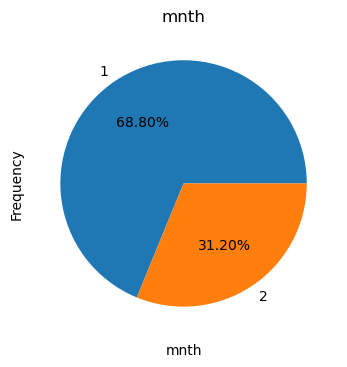

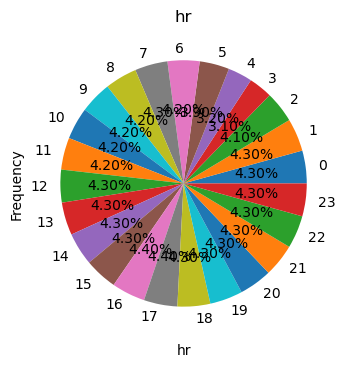

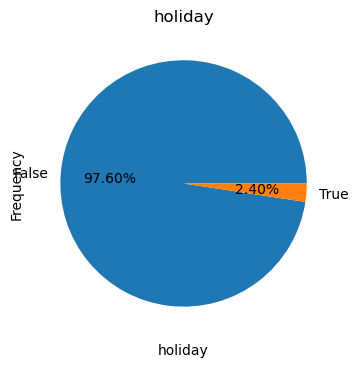

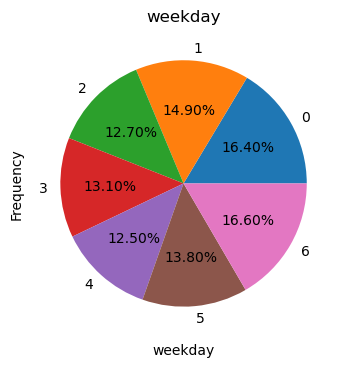

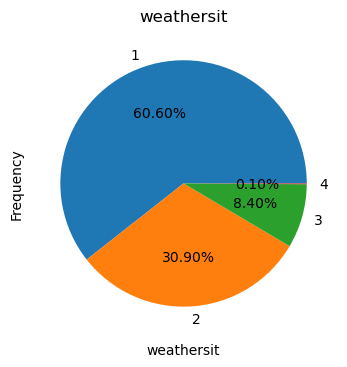

In [125]:
# checked categorical data visualisation by using pie chart
for col in categorical_col2:
    fig= plt.figure(figsize=(8,4))
    ax= fig.gca()
    combined_dataset[col].value_counts().sort_index().plot.pie(autopct="%1.2f%%")
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
plt.show()

In [127]:
# Observations:
# The mnth column shows that 1 mnth i.e. January has a highest frequency as compare to 2 mnth february. 
# The hr(hour) column shows bwetween 3-4 have less frequency.
# The working days have a high number of data as compare to holyday.
# weathersit like 1 (clear) have a high number of frequency as compare to others.

# Compute correlations between attributes to identify relationships. 

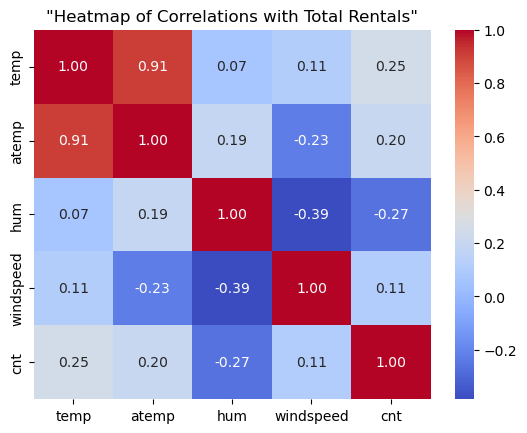

In [130]:
# first lets check numerical columns correlatins with cnt (total Rental Counts) by using Heatmap
sns.heatmap(combined_dataset[numerical_data2].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('"Heatmap of Correlations with Total Rentals"')
plt.show()

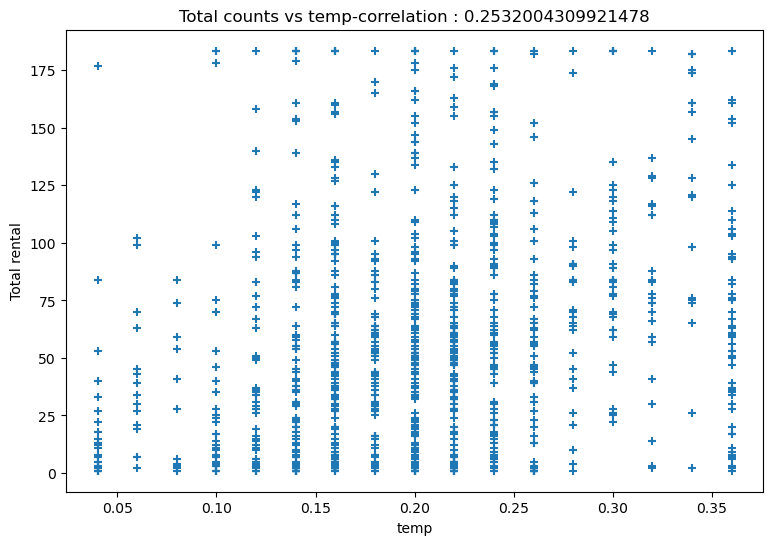

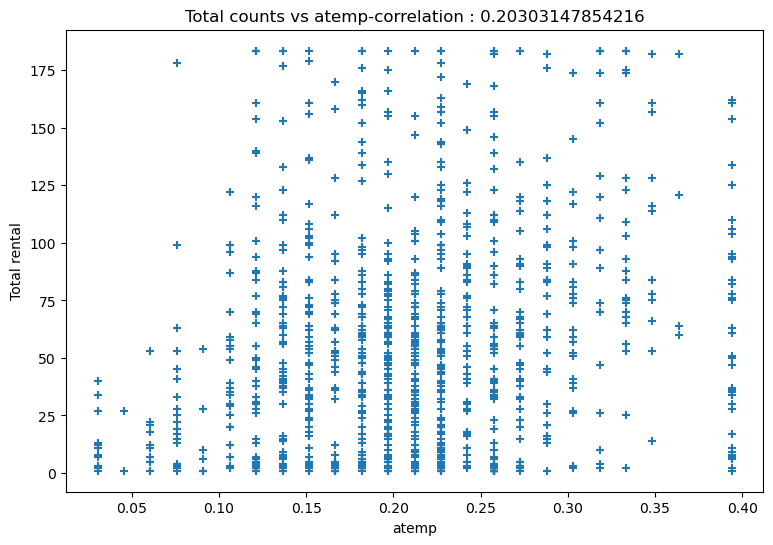

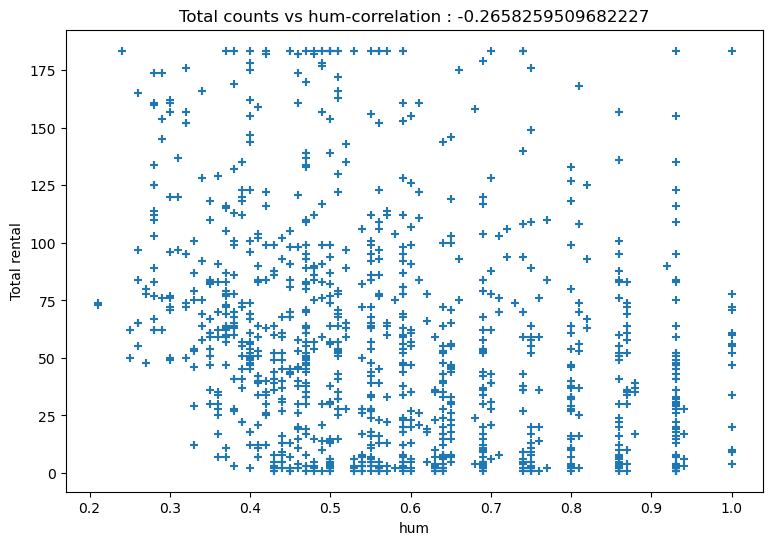

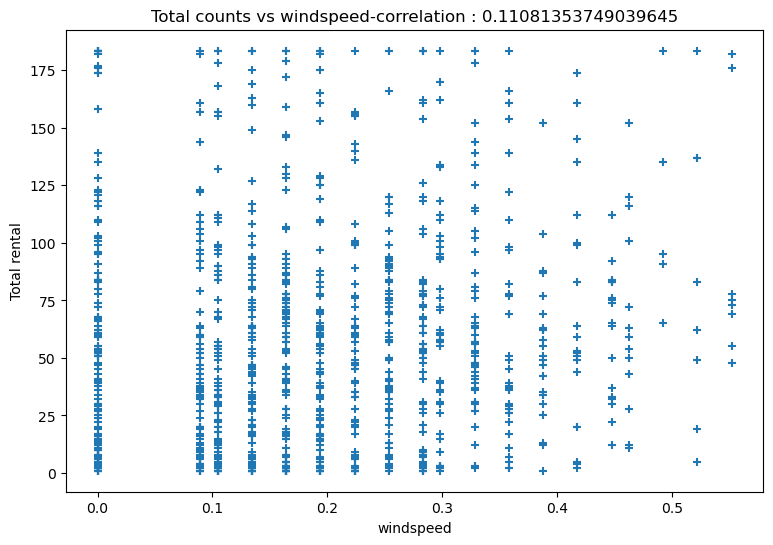

In [132]:
# lets check numerical columns correlatins with cnt (total Rental Counts) by using Scatter plot
# here seprate list is created which contain numerical columns excluding cnt(total counts column)
numeric_feature = ['temp','atemp','hum','windspeed']
for col in numeric_feature:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = combined_dataset[col]
    label= combined_dataset['cnt']
    correlation = combined_dataset[col].corr(combined_dataset['cnt'])
    plt.scatter(x=feature, y=label,marker='+')
    plt.xlabel(col)
    plt.ylabel('Total rental')
    ax.set_title('Total counts vs ' +  col + '-correlation : '  +  str(correlation))
plt.show()

# Finding:-Correaltion of Numerical Columns with target data i.e. cnt (Total numner of rental)

In [135]:
# By Observing Correaltion between Numerical Columns and cnt (Total numner of rental):- 
# it came to know that temp, atemp and windspeed have a positive correlations with cnt (Total numner of rental).
# hum has a negative correlations with cnt (Total numner of rental).
# Conclusion: if temp, atemp, windspeed are increased then cnt (Total numner of rental) also increases but in context of hum, cnt (Total numner of rental) increases when hum decreases. 

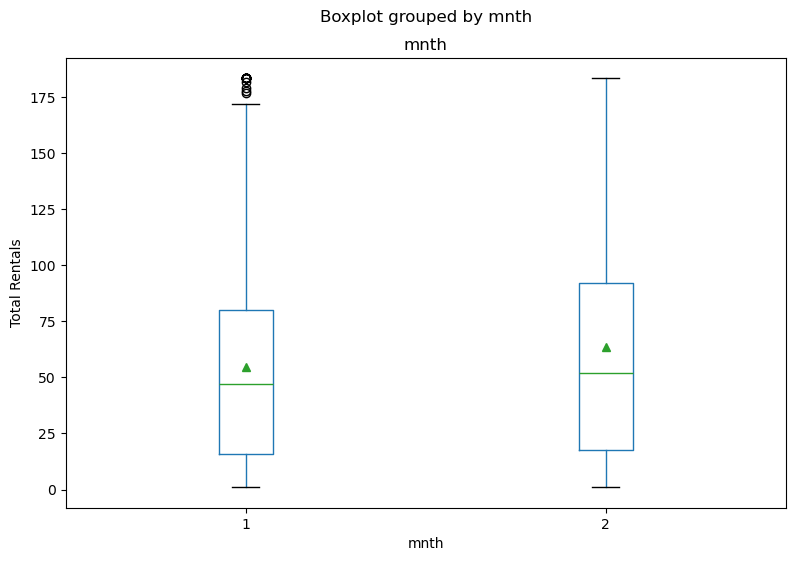

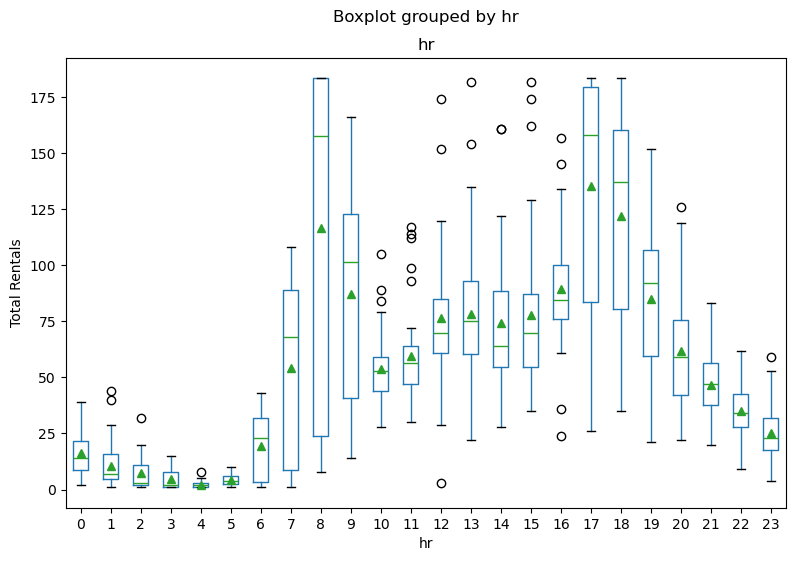

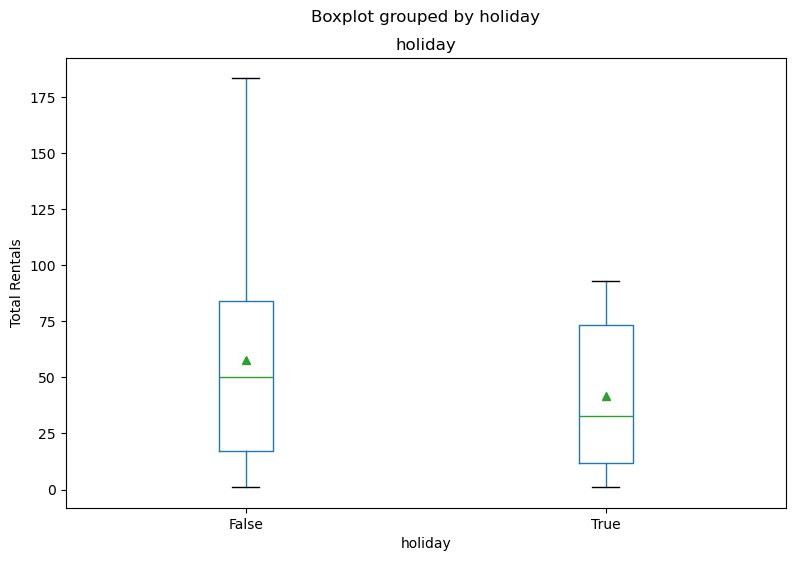

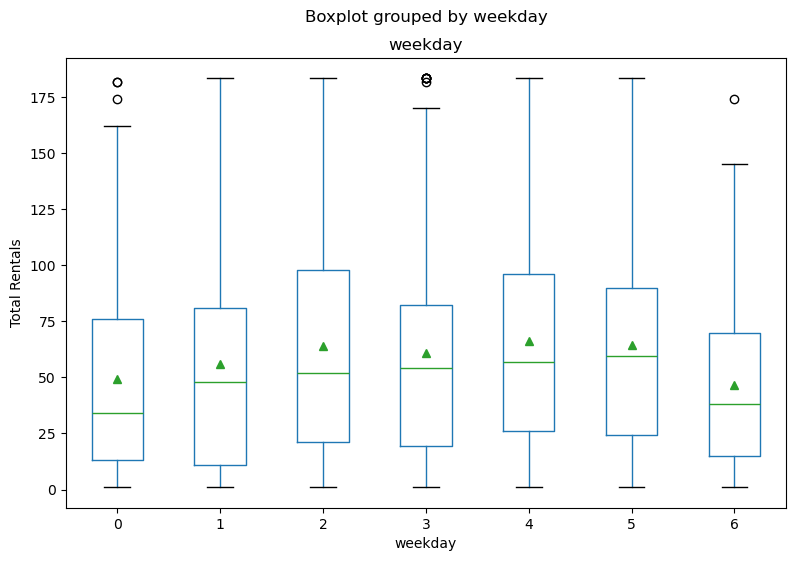

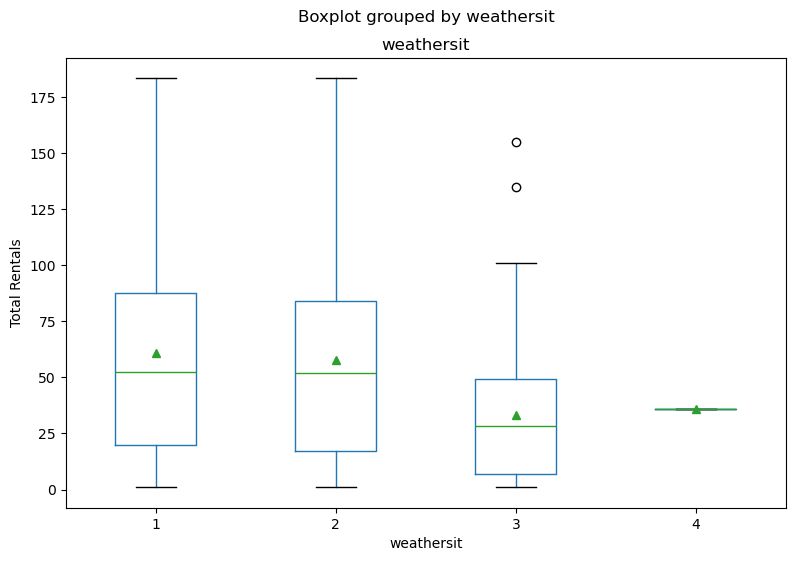

In [137]:
# lets check categorical columns correlatins with cnt (total Rental Counts) by using Box plot
for col in categorical_col2:
    fig = plt.figure(figsize = (9,6))
    ax = fig.gca()
    combined_dataset.boxplot(column='cnt' , by = col, ax = ax,grid=False, showmeans=True)
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel('Total Rentals')
    plt.show()

# Finding:- Correaltion of categorical columns with target data i.e. cnt (Total numner of rental)

In [140]:
# By Observing Correaltion between categorical columns  and cnt (Total number of rental):- 
# it came to know that mnth specially 2nd i.e. february has more number of rental as compare to 1st mnth i.e. January.
# In hr(hours) column, morning 7,8 and 9 and eveining 17,18,and 19 have a highest number of rental. 
# By considering a holyday column, it came to know that working days have more number of rental as compare to holyday.
# By Analysing weekday column(if'0' is considered as a Sunday) in Tuesday people have taken highest number of rental service followed bt Thursday and Friday.
# In weathersit(weather situation) 1:Clear, Few clouds, Partly cloudy, Partly cloudy, 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist, 
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +Scattered clouds have more rental service as compare to 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.        
# Conclusion: All categorical data are also affected to cnt (Total numner of rental), it increases or decreases according to data.